In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
print('The control group size is: ', len(df[df.group == 'control']))
print('The treatment group size is: ', len(df[df.group == 'treatment']))

The control group size is:  145274
The treatment group size is:  145311


In [7]:
# Sample sizes are sufficent
# Let's look at the outcome overall before we look at outcomes over time.
print('Conversion ratio for the control group is: ', df[df.group == 'control'].converted.mean())
print('Conversion ratio for the treatment group is:', df[df.group == 'treatment'].converted.mean())
stats.ttest_ind(df[df.group == 'control'].converted, df[df.group == 'treatment'].converted)

Conversion ratio for the control group is:  0.1203863045004612
Conversion ratio for the treatment group is: 0.11880724790277405


Ttest_indResult(statistic=1.3116069027036805, pvalue=0.18965383906859376)

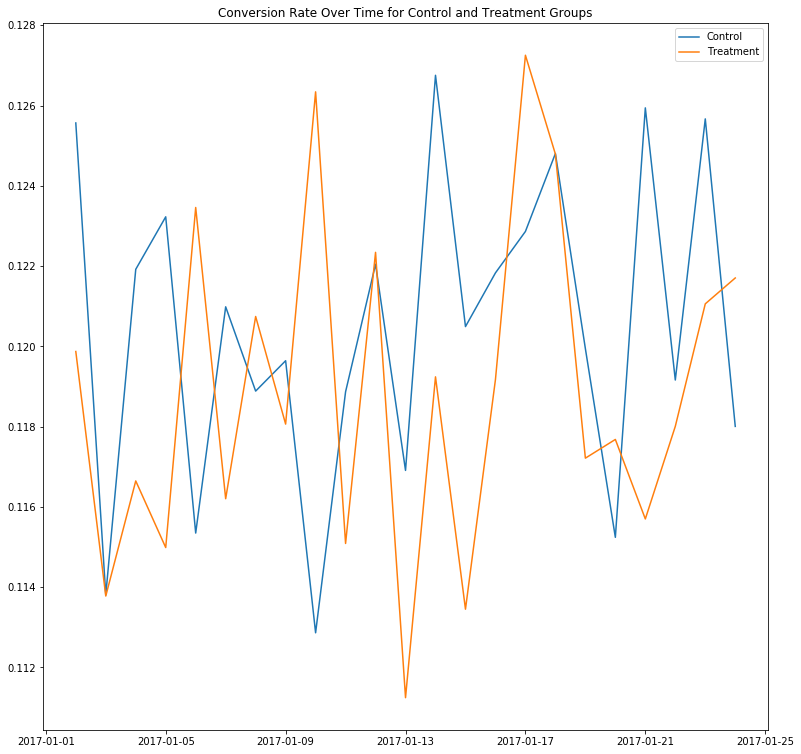

In [32]:
# We see that overall there is not a statistically significant difference between the two gropus. Let's move
# on to looking at the changes over time.

# First we need to group all the timestamps by date
df['date'] = pd.DatetimeIndex(df['timestamp']).date


plt.figure(figsize = (13,13))
plt.plot(df[df.group == 'control'][['date', 'converted']].groupby('date').mean())
plt.plot(df[df.group == 'treatment'][['date', 'converted']].groupby('date').mean())
plt.legend(['Control', 'Treatment'])
plt.title('Conversion Rate Over Time for Control and Treatment Groups')
plt.show()

In [39]:
print('Treatment effectiveness by date:', '\n')
for date in df.date.unique():
    by_date = df[df.date == date]
    print(date, ':',  stats.ttest_ind(by_date[by_date.group == 'control'].converted, by_date[by_date.group == 'treatment'].converted), '\n')
    

Treatment effectiveness by date: 

2017-01-21 : Ttest_indResult(statistic=1.8123288054674913, pvalue=0.0699579338988825) 

2017-01-12 : Ttest_indResult(statistic=-0.05182821974845549, pvalue=0.9586663564605943) 

2017-01-11 : Ttest_indResult(statistic=0.6795024407954999, pvalue=0.49683133482307695) 

2017-01-08 : Ttest_indResult(statistic=-0.33111903181744556, pvalue=0.7405597598504309) 

2017-01-10 : Ttest_indResult(statistic=-2.3999515991310387, pvalue=0.01641085244784032) 

2017-01-19 : Ttest_indResult(statistic=0.4836129647924235, pvalue=0.628668638020595) 

2017-01-17 : Ttest_indResult(statistic=-0.7611804663738991, pvalue=0.446562930057432) 

2017-01-04 : Ttest_indResult(statistic=0.9315635899845935, pvalue=0.3515792521983202) 

2017-01-15 : Ttest_indResult(statistic=1.261388402374626, pvalue=0.20719113309271808) 

2017-01-18 : Ttest_indResult(statistic=0.0026642818202597274, pvalue=0.9978742538059032) 

2017-01-09 : Ttest_indResult(statistic=0.28071255594768935, pvalue=0.7789352

In [ ]:
# Based upon the above output we see only one date where there is a statistically significant difference
# between the two groups: 2017-1-10. However overall we do not see a difference between the two populations.
# This one day could be a random fluctuation in the conversion rates. The graph clearly illustrates that 
# conversion rates in this sample experience wide swings. Overall we can say that this is not an effective 
# treatment